In [173]:
from waterlevels_oker import utils
from waterlevels_oker.data import preprocess_weather_data
import pandas as pd
import numpy as np
import seaborn as sns

%config InlineBackend.figure_format = "retina"

# Import & Cleaning

In [33]:
measurements_2019 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2019",
	header=[0, 1],
)

In [34]:
measurements_2019

2019              Datum Okertalsperre             Schladen  \
    Unnamed: 0_level_1 Unnamed: 1_level_1      Füll (%) Abg. (m³/s)        m   
0                  Di.         2019-01-01          37.0        1.40     0.72   
1                   Mi         2019-01-02          38.0        1.40     0.73   
2                   Do         2019-01-03          38.0        1.40     0.72   
3                   Fr         2019-01-04          39.0        1.40     0.72   
4                   Sa         2019-01-05          39.0        1.36     0.80   
..                 ...                ...           ...         ...      ...   
360                 Fr         2019-12-27          33.0        1.30     0.68   
361                 Sa         2019-12-28          34.0        1.30     0.68   
362                 So         2019-12-29          34.0        1.30     0.69   
363                 Mo         2019-12-30          35.0        1.30     0.68   
364                 Di         2019-12-31          35.0        1.30     0.68   

           Ohrum               sensoweb  ... Eisenbütteler Wehr Petriwehr  \
     88.72     m  75.54 m³/s Schäferbr.  ...                 OW        OW   
0    89.44  1.29  76.83  4.5      72.45  ...              70.75     69.21   
1    89.45  1.36  76.90  5.0      72.51  ...              70.75     69.27   
2    89.44  1.22  76.76  4.0      72.46  ...              70.73     69.30   
3    89.44  1.19  76.73  3.7      72.43  ...              70.75     69.20   
4    89.52  1.31  76.85  4.5      72.43  ...              70.75     69.34   
..     ...   ...    ...  ...        ...  ...                ...       ...   
360  89.40  1.21  76.75  3.9      72.41  ...              70.73     69.42   
361  89.40  1.18  76.72  3.6      72.39  ...              70.72     69.40   
362  89.41  1.17  76.71  3.6      72.39  ...              70.68     69.39   
363  89.40  1.15  76.69  3.5      72.39  ...              70.69     69.38   
364  89.40  1.16  76.70  3.5        NaN  ...              70.72     69.37   

    Wendenwehr Tel.: 2511 Ölper Wehr           Groß Schwülper         \
            OW        HKW         OW Veltenhof              m  55.99   
0        69.24      66.68      66.60     64.04           2.39  58.38   
1        69.27      66.71      66.60     64.02           2.38  58.37   
2        69.33      66.68      66.59     64.03           2.39  58.38   
3        69.22      66.68      66.57     63.97           2.36  58.35   
4        69.38      66.69      66.59     63.97           2.33  58.32   
..         ...        ...        ...       ...            ...    ...   
360      69.45      66.59      66.55     63.94           2.43  58.42   
361      69.42      66.59      66.55     63.85           2.35  58.34   
362      69.40      66.59      66.54     63.85           2.30  58.29   
363      69.39      66.59      66.54     63.81           2.27  58.26   
364      69.39      66.60      66.56     63.79           2.26  58.25   

         Wetter        
    Niederschl. Temp.  
0           2.6   7.0  
1           0.0   2.0  
2           0.0  -5.0  
3           0.9   2.0  
4           5.0   5.0  
..          ...   ...  
360         0.3   1.0  
361         0.0  -3.0  
362         0.0  -4.0  
363         0.0   1.0  
364         0.2   2.0  

[365 rows x 22 columns]

In [36]:
cols_to_drop = {
	year: [
		(year, "Unnamed: 0_level_1"),
		("Schladen", "m"),
		("Schladen", 88.72),
		("Ohrum", "m"),
		("Ohrum", 75.54),
		("Ohrum", "m³/s"),
		("sensoweb", "Schäferbr."),
		("sensoweb", "Rüningen"),
		("sensoweb", "DLRG"),
		("Groß Schwülper", "m"),
		("Groß Schwülper", 55.99),
		("Wetter", "Niederschl."),
		("Wetter", "Temp."),
	]
	for year in [2019, 2020, 2021, 2022, 2023]
}

In [37]:
measurements_2019 = measurements_2019.drop(columns=cols_to_drop[2019])
measurements_2019

Datum Okertalsperre             Eisenbütteler Wehr Petriwehr  \
    Unnamed: 1_level_1      Füll (%) Abg. (m³/s)                 OW        OW   
0           2019-01-01          37.0        1.40              70.75     69.21   
1           2019-01-02          38.0        1.40              70.75     69.27   
2           2019-01-03          38.0        1.40              70.73     69.30   
3           2019-01-04          39.0        1.40              70.75     69.20   
4           2019-01-05          39.0        1.36              70.75     69.34   
..                 ...           ...         ...                ...       ...   
360         2019-12-27          33.0        1.30              70.73     69.42   
361         2019-12-28          34.0        1.30              70.72     69.40   
362         2019-12-29          34.0        1.30              70.68     69.39   
363         2019-12-30          35.0        1.30              70.69     69.38   
364         2019-12-31          35.0        1.30              70.72     69.37   

    Wendenwehr Tel.: 2511 Ölper Wehr            
            OW        HKW         OW Veltenhof  
0        69.24      66.68      66.60     64.04  
1        69.27      66.71      66.60     64.02  
2        69.33      66.68      66.59     64.03  
3        69.22      66.68      66.57     63.97  
4        69.38      66.69      66.59     63.97  
..         ...        ...        ...       ...  
360      69.45      66.59      66.55     63.94  
361      69.42      66.59      66.55     63.85  
362      69.40      66.59      66.54     63.85  
363      69.39      66.59      66.54     63.81  
364      69.39      66.60      66.56     63.79  

[365 rows x 9 columns]

In [50]:
measurements_2019.columns = measurements_2019.columns.to_flat_index()
measurements_2019 = measurements_2019.rename(
	columns={measurements_2019.columns[0]: "date"}
)
measurements_2019

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2019-01-01,37.0,1.40,70.75,69.21,69.24,66.68,66.60,64.04
1,2019-01-02,38.0,1.40,70.75,69.27,69.27,66.71,66.60,64.02
2,2019-01-03,38.0,1.40,70.73,69.30,69.33,66.68,66.59,64.03
3,2019-01-04,39.0,1.40,70.75,69.20,69.22,66.68,66.57,63.97
4,2019-01-05,39.0,1.36,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...,...
360,2019-12-27,33.0,1.30,70.73,69.42,69.45,66.59,66.55,63.94
361,2019-12-28,34.0,1.30,70.72,69.40,69.42,66.59,66.55,63.85
362,2019-12-29,34.0,1.30,70.68,69.39,69.40,66.59,66.54,63.85
363,2019-12-30,35.0,1.30,70.69,69.38,69.39,66.59,66.54,63.81


In [61]:
measurements_2020 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2020",
	header=[0, 1],
)

In [62]:
measurements_2020 = measurements_2020.drop(columns=cols_to_drop[2020]).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2020

2020 Okertalsperre             Eisenbütteler Wehr Petriwehr  \
    Unnamed: 1_level_1      Füll (%) Abg. (m³/s)                 OW        OW   
0           2020-01-01            35         1.3              70.71     69.36   
1           2020-01-02            35         1.3              70.70     69.36   
2           2020-01-03            35         1.3              70.71     69.34   
3           2020-01-04            35         1.3              70.71     69.35   
4           2020-01-05            35         1.3              70.75     69.44   
..                 ...           ...         ...                ...       ...   
361         2020-12-27            30         1.3              70.75         -   
362         2020-12-28            30         1.3              70.75         -   
363         2020-12-29            30         1.3              70.77         -   
364         2020-12-30            30         1.3              70.75         -   
365         2020-12-31            30         1.3              70.76         -   

    Wendenwehr Tel.: 2511 Ölper Wehr            
            OW        HKW         OW Veltenhof  
0        69.37      66.58      66.56     63.77  
1        69.37      66.58      66.55     63.77  
2        69.35      66.58      66.55     63.78  
3        69.36      66.58      66.56     63.78  
4        69.46      66.59      66.56     63.93  
..         ...        ...        ...       ...  
361      68.83      66.52      66.48     63.74  
362      68.79      66.52      66.50     63.70  
363      68.77      66.53      66.49     63.64  
364      68.80      66.52      66.51     63.60  
365      68.78      66.52      66.49     63.65  

[366 rows x 9 columns]

In [63]:
measurements_2020.columns = measurements_2020.columns.to_flat_index()
measurements_2020 = measurements_2020.rename(
	columns={measurements_2020.columns[0]: "date"}
)
measurements_2020

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2020-01-01,35,1.3,70.71,69.36,69.37,66.58,66.56,63.77
1,2020-01-02,35,1.3,70.70,69.36,69.37,66.58,66.55,63.77
2,2020-01-03,35,1.3,70.71,69.34,69.35,66.58,66.55,63.78
3,2020-01-04,35,1.3,70.71,69.35,69.36,66.58,66.56,63.78
4,2020-01-05,35,1.3,70.75,69.44,69.46,66.59,66.56,63.93
...,...,...,...,...,...,...,...,...,...
361,2020-12-27,30,1.3,70.75,-,68.83,66.52,66.48,63.74
362,2020-12-28,30,1.3,70.75,-,68.79,66.52,66.50,63.70
363,2020-12-29,30,1.3,70.77,-,68.77,66.53,66.49,63.64
364,2020-12-30,30,1.3,70.75,-,68.80,66.52,66.51,63.60


In [68]:
measurements_2021 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2021",
	header=[1, 2],
)
measurements_2021

2021                    Okertalsperre             Schladen  \
    Unnamed: 0_level_1 Unnamed: 1_level_1      Füll (%) Abg. (m³/s)        m   
0                   Fr         2021-01-01            30         1.3     0.66   
1                   Sa         2021-01-02            29         1.3     0.66   
2                   So         2021-01-03            30         1.3     0.67   
3                   Mo         2021-01-04            29         1.3     0.68   
4                   Di         2021-01-05            29         1.3     0.67   
..                 ...                ...           ...         ...      ...   
360                 Mo         2021-12-27            36         1.3     0.71   
361                 Di         2021-12-28            36         1.3     0.72   
362                 Mi         2021-12-29            36         1.3     0.72   
363                 Do         2021-12-30            36         1.3     0.72   
364                 Fr         2021-12-31            37         1.3     0.73   

           Ohrum               sensoweb  ... Eisenbütteler Wehr Petriwehr  \
     88.72     m  75.54 m³/s Schäferbr.  ...                 UW        OW   
0    89.38  1.03  76.57  2.8      72.38  ...              68.88       NaN   
1    89.38  1.01  76.55  2.6      72.38  ...              68.85       NaN   
2    89.39  1.05  76.59  3.0      72.38  ...              68.86       NaN   
3    89.40  1.09  76.63  3.1      72.38  ...              68.94       NaN   
4    89.39  1.07  76.61  3.0      72.38  ...              68.99       NaN   
..     ...   ...    ...  ...        ...  ...                ...       ...   
360  89.43  1.17  76.71  3.6      72.41  ...              69.01     68.93   
361  89.44  1.19  76.73  3.7      72.44  ...              69.26     69.22   
362  89.44  1.20  76.74  3.8      72.46  ...              69.27     69.23   
363  89.44  1.21  76.75  3.8      72.45  ...              69.18     69.14   
364  89.45  1.23  76.77  3.9      72.46  ...              69.21     69.17   

    Wendenwehr Tel.: 2511 Ölper Wehr           Groß Schwülper         \
            OW        HKW         OW Veltenhof              m  55.99   
0        68.77      66.52      69.49     63.65           2.19  58.18   
1        68.76      66.53      66.49     63.64           2.19  58.18   
2        68.75      66.53      66.49     63.64           2.18  58.17   
3        68.84      66.52      66.51     63.70           2.22  58.21   
4        68.92      66.52      66.50     63.72           2.25  58.24   
..         ...        ...        ...       ...            ...    ...   
360      68.97      66.58      66.55     63.90           2.42  58.41   
361      69.25      66.61      66.57     63.76           2.32  58.31   
362      69.26      66.62      66.54     63.88           2.41  58.40   
363      69.16      66.61      66.53     63.94           2.49  58.48   
364      69.18      66.62      66.56     63.93           2.55  58.54   

         Wetter        
    Niederschl. Temp.  
0           0.0   0.0  
1           0.0   1.0  
2           6.4   1.0  
3           2.1   1.0  
4           2.0   1.0  
..          ...   ...  
360         0.2  -3.0  
361         3.7   5.0  
362         2.8   4.0  
363         2.7   9.0  
364         0.5  13.0  

[365 rows x 23 columns]

In [69]:
measurements_2021 = measurements_2021.drop(columns=cols_to_drop[2021]).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2021

2021 Okertalsperre             Eisenbütteler Wehr Petriwehr  \
    Unnamed: 1_level_1      Füll (%) Abg. (m³/s)                 OW        OW   
0           2021-01-01            30         1.3              70.75       NaN   
1           2021-01-02            29         1.3              70.74       NaN   
2           2021-01-03            30         1.3              70.76       NaN   
3           2021-01-04            29         1.3              70.76       NaN   
4           2021-01-05            29         1.3              70.75       NaN   
..                 ...           ...         ...                ...       ...   
360         2021-12-27            36         1.3              70.72     68.93   
361         2021-12-28            36         1.3              70.71     69.22   
362         2021-12-29            36         1.3              70.75     69.23   
363         2021-12-30            36         1.3              70.80     69.14   
364         2021-12-31            37         1.3              70.81     69.17   

    Wendenwehr Tel.: 2511 Ölper Wehr            
            OW        HKW         OW Veltenhof  
0        68.77      66.52      69.49     63.65  
1        68.76      66.53      66.49     63.64  
2        68.75      66.53      66.49     63.64  
3        68.84      66.52      66.51     63.70  
4        68.92      66.52      66.50     63.72  
..         ...        ...        ...       ...  
360      68.97      66.58      66.55     63.90  
361      69.25      66.61      66.57     63.76  
362      69.26      66.62      66.54     63.88  
363      69.16      66.61      66.53     63.94  
364      69.18      66.62      66.56     63.93  

[365 rows x 9 columns]

In [70]:
measurements_2021.columns = measurements_2021.columns.to_flat_index()
measurements_2021 = measurements_2021.rename(
	columns={measurements_2021.columns[0]: "date"}
)
measurements_2021

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2021-01-01,30,1.3,70.75,NaN,68.77,66.52,69.49,63.65
1,2021-01-02,29,1.3,70.74,NaN,68.76,66.53,66.49,63.64
2,2021-01-03,30,1.3,70.76,NaN,68.75,66.53,66.49,63.64
3,2021-01-04,29,1.3,70.76,NaN,68.84,66.52,66.51,63.70
4,2021-01-05,29,1.3,70.75,NaN,68.92,66.52,66.50,63.72
...,...,...,...,...,...,...,...,...,...
360,2021-12-27,36,1.3,70.72,68.93,68.97,66.58,66.55,63.90
361,2021-12-28,36,1.3,70.71,69.22,69.25,66.61,66.57,63.76
362,2021-12-29,36,1.3,70.75,69.23,69.26,66.62,66.54,63.88
363,2021-12-30,36,1.3,70.80,69.14,69.16,66.61,66.53,63.94


In [99]:
measurements_2022 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2022",
	header=[0, 1],
)
measurements_2022

2022                      Okertalsperre             Schladen         \
    Uhrzeit Uhrzeit.1  Uhrzeit.2      Füll (%) Abg. (m³/s)        m  88.72   
0       NaN        Sa 2022-01-01            38         1.3     0.72  89.44   
1       NaN        So 2022-01-02            38         1.3     0.72  89.44   
2      Kw.1        Mo 2022-01-03            39         1.3     0.74  89.46   
3       NaN        Di 2022-01-04            40         1.3     0.74  89.46   
4       NaN        Mi 2022-01-05            40         1.3     0.75  89.47   
..      ...       ...        ...           ...         ...      ...    ...   
360    KW52        Di 2022-12-27            25         1.1     0.73  89.45   
361     NaN        Mi 2022-12-28            26         1.3     0.72  89.44   
362     NaN        Do 2022-12-29            27         1.3     0.70  89.42   
363     NaN        Fr 2022-12-30            27         1.3     0.70  89.42   
364     NaN        Sa 2022-12-31            28         1.3     0.70  89.42   

    Ohrum               ... Petriwehr Wendenwehr       Tel.: 2511 Ölper Wehr  \
        m  75.54  m³/s  ...        UW         OW    UW        HKW         OW   
0    1.25  76.79  4.20  ...       NaN      69.24  66.6      66.61      66.57   
1    1.19  76.73  3.70  ...       NaN      69.15  66.6      66.62      66.56   
2    1.25  76.79  4.20  ...       NaN      69.16  66.6      66.60      66.55   
3    1.25  76.79  4.20  ...       NaN      69.25  66.6      66.59      66.55   
4    1.27  76.81  4.32  ...       NaN      69.28  66.6      66.62      66.56   
..    ...    ...   ...  ...       ...        ...   ...        ...        ...   
360  1.35  76.89  4.90  ...     66.50      69.35  66.6      66.46      66.46   
361  1.13  76.67  3.30  ...     66.51      69.33  66.6      66.49      66.50   
362  1.12  76.66  3.30  ...     66.49      69.35  66.6      66.47      66.49   
363  1.16  76.70  3.60  ...     66.51      69.34  66.6      66.48      66.50   
364  1.11  76.65  3.20  ...     66.57      69.37  66.6      66.53      66.51   

              Groß Schwülper             Wetter        
    Veltenhof              m  55.99 Niederschl. Temp.  
0       63.93           2.55  58.54         0.0  13.0  
1       63.93           2.51  58.50         0.1  11.0  
2       63.89           2.45  58.44         0.9  10.0  
3       63.87           2.42  58.41         0.3   7.0  
4       63.98           2.44  58.43         6.3   3.0  
..        ...            ...    ...         ...   ...  
360     64.04           2.67  58.66         1.0   1.0  
361     63.93           2.56  58.55         0.1   3.0  
362     63.78           2.38  58.37         0.2   8.0  
363     63.80           2.37  58.36         0.0   5.0  
364     63.86           2.39  58.38         5.5  10.0  

[365 rows x 28 columns]

In [100]:
cols_to_drop_2022 = [
	(2022, "Uhrzeit"),
	(2022, "Uhrzeit.1"),
	("Schladen", "m"),
	("Schladen", 88.72),
	("Ohrum", "m"),
	("Ohrum", 75.54),
	("Ohrum", "m³/s"),
	("sensoweb", "Schäferbr."),
	("sensoweb", "Rüningen"),
	("sensoweb", "DLRG"),
	("Groß Schwülper", "m"),
	("Groß Schwülper", 55.99),
	("Wetter", "Niederschl."),
	("Wetter", "Temp."),
	("Eisenbütteler Wehr", "UW"),
	("Eisenbütteler Wehr", "m³/s"),
	("Eisenbütteler Wehr", "Kalenwall"),
	("Petriwehr", "UW"),
	("Wendenwehr", "UW"),
]

In [101]:
measurements_2022 = measurements_2022.drop(columns=cols_to_drop_2022)
measurements_2022

2022 Okertalsperre             Eisenbütteler Wehr Petriwehr  \
     Uhrzeit.2      Füll (%) Abg. (m³/s)                 OW        OW   
0   2022-01-01            38         1.3              70.80     69.22   
1   2022-01-02            38         1.3              70.79     69.14   
2   2022-01-03            39         1.3              70.74     69.15   
3   2022-01-04            40         1.3              70.80     69.23   
4   2022-01-05            40         1.3              70.73     69.24   
..         ...           ...         ...                ...       ...   
360 2022-12-27            25         1.1              70.84     69.30   
361 2022-12-28            26         1.3              70.79     69.30   
362 2022-12-29            27         1.3              70.81     69.30   
363 2022-12-30            27         1.3              70.81     69.30   
364 2022-12-31            28         1.3              70.80     69.30   

    Wendenwehr Tel.: 2511 Ölper Wehr            
            OW        HKW         OW Veltenhof  
0        69.24      66.61      66.57     63.93  
1        69.15      66.62      66.56     63.93  
2        69.16      66.60      66.55     63.89  
3        69.25      66.59      66.55     63.87  
4        69.28      66.62      66.56     63.98  
..         ...        ...        ...       ...  
360      69.35      66.46      66.46     64.04  
361      69.33      66.49      66.50     63.93  
362      69.35      66.47      66.49     63.78  
363      69.34      66.48      66.50     63.80  
364      69.37      66.53      66.51     63.86  

[365 rows x 9 columns]

In [102]:
measurements_2022.columns = measurements_2022.columns.to_flat_index()
measurements_2022 = measurements_2022.rename(
	columns={measurements_2022.columns[0]: "date"}
)
measurements_2022

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2022-01-01,38,1.3,70.80,69.22,69.24,66.61,66.57,63.93
1,2022-01-02,38,1.3,70.79,69.14,69.15,66.62,66.56,63.93
2,2022-01-03,39,1.3,70.74,69.15,69.16,66.60,66.55,63.89
3,2022-01-04,40,1.3,70.80,69.23,69.25,66.59,66.55,63.87
4,2022-01-05,40,1.3,70.73,69.24,69.28,66.62,66.56,63.98
...,...,...,...,...,...,...,...,...,...
360,2022-12-27,25,1.1,70.84,69.30,69.35,66.46,66.46,64.04
361,2022-12-28,26,1.3,70.79,69.30,69.33,66.49,66.50,63.93
362,2022-12-29,27,1.3,70.81,69.30,69.35,66.47,66.49,63.78
363,2022-12-30,27,1.3,70.81,69.30,69.34,66.48,66.50,63.80


In [121]:
measurements_2023 = pd.read_excel(
	utils.get_raw_path("Übersicht Pegelwerte 2019-2023.xlsx"),
	sheet_name="2023",
	header=[0, 1],
)
measurements_2023

2023                      Okertalsperre             Schladen         \
    Uhrzeit Uhrzeit.1  Uhrzeit.2      Füll (%) Abg. (m³/s)        m  88.72   
0       NaN        So 2023-01-01            28         1.3     0.68  89.40   
1      Kw.1        Mo 2023-01-02            28         1.3     0.68  89.40   
2       NaN        Di 2023-01-03            29         1.3     0.70  89.42   
3       NaN        Mi 2023-01-04            29         1.3     0.68  89.40   
4       NaN        Do 2023-01-05            30         1.3     0.73  89.45   
..      ...       ...        ...           ...         ...      ...    ...   
360     NaN        Mi 2023-12-27           101        20.6     2.85  91.57   
361     NaN        Do 2023-12-28          99.7        21.8     2.57  91.29   
362     NaN        Fr 2023-12-29          97.4          22     2.52  91.24   
363     NaN        Sa 2023-12-30          95.4        20.5     2.59  91.31   
364     NaN        So 2023-12-31          93.9        20.4     2.41  91.13   

    Ohrum              ... Eisenbütteler Wehr Petriwehr Wendenwehr Tel.: 2511  \
        m  75.54 m³/s  ...          Kalenwall        OW         OW        HKW   
0    1.10  76.64  3.2  ...                  -     69.30      69.34      66.48   
1    0.87  76.41  2.0  ...                  -     69.30      69.34      66.49   
2    1.03  76.57  2.7  ...                  -     69.30      69.33      66.48   
3    0.98  76.52  2.5  ...                  -     69.30      69.34      66.50   
4    1.16  76.70  3.5  ...                  -     69.30      69.37      66.51   
..    ...    ...  ...  ...                ...       ...        ...        ...   
360  4.33  79.87  NaN  ...              70.17     69.04      68.75      68.11   
361  4.29  79.83  NaN  ...              70.14     68.99      68.67      68.10   
362  4.21  79.75  NaN  ...              69.97     68.72      68.42      68.11   
363  4.17  79.71  NaN  ...              69.78     68.65      68.27      68.00   
364  4.19  79.73  NaN  ...              69.69     68.58      68.18      67.98   

    Ölper Wehr           Veltenhof Groß Schwülper             Wetter        
            OW Unnamed: 21_level_1              m  55.99 Niederschl. Temp.  
0        66.51               63.77           2.38  58.37         0.2    11  
1        66.51               63.75           2.37  58.36         0.6    10  
2        66.50               63.74           2.27  58.26         0.2     5  
3        66.49               63.71           2.27  58.26         3.9     7  
4        66.51               63.79           2.30  58.29        10.0    10  
..         ...                 ...            ...    ...         ...   ...  
360      67.85               66.16           5.49  61.48         0.0     6  
361      67.84               66.15           5.42  61.41         0.0     7  
362      67.77               66.10           5.25  61.24         5.6     6  
363      67.76               66.05           5.11  61.10         0.7     6  
364      67.74               66.02           5.01  61.00         0.0     4  

[365 rows x 26 columns]

In [122]:
cols_to_drop_2023 = [
	(2023, "Uhrzeit"),
	(2023, "Uhrzeit.1"),
	("Schladen", "m"),
	("Schladen", 88.72),
	("Ohrum", "m"),
	("Ohrum", 75.54),
	("Ohrum", "m³/s"),
	("sensoweb", "Schäferbr."),
	("sensoweb", "Rüningen"),
	("sensoweb", "DLRG"),
	("Groß Schwülper", "m"),
	("Groß Schwülper", 55.99),
	("Wetter", "Niederschl."),
	("Wetter", "Temp."),
	("Eisenbütteler Wehr", "m³/s"),
	("Eisenbütteler Wehr", "Kalenwall"),
]

In [123]:
measurements_2023 = measurements_2023.drop(columns=cols_to_drop_2023).drop(
	columns=[("Eisenbütteler Wehr", "UW")]
)
measurements_2023

2023 Okertalsperre             Eisenbütteler Wehr Petriwehr  \
     Uhrzeit.2      Füll (%) Abg. (m³/s)                 OW        OW   
0   2023-01-01            28         1.3              70.79     69.30   
1   2023-01-02            28         1.3              70.79     69.30   
2   2023-01-03            29         1.3              70.78     69.30   
3   2023-01-04            29         1.3              70.81     69.30   
4   2023-01-05            30         1.3              70.80     69.30   
..         ...           ...         ...                ...       ...   
360 2023-12-27           101        20.6              71.06     69.04   
361 2023-12-28          99.7        21.8              71.07     68.99   
362 2023-12-29          97.4          22              70.72     68.72   
363 2023-12-30          95.4        20.5              70.60     68.65   
364 2023-12-31          93.9        20.4              70.51     68.58   

    Wendenwehr Tel.: 2511 Ölper Wehr           Veltenhof  
            OW        HKW         OW Unnamed: 21_level_1  
0        69.34      66.48      66.51               63.77  
1        69.34      66.49      66.51               63.75  
2        69.33      66.48      66.50               63.74  
3        69.34      66.50      66.49               63.71  
4        69.37      66.51      66.51               63.79  
..         ...        ...        ...                 ...  
360      68.75      68.11      67.85               66.16  
361      68.67      68.10      67.84               66.15  
362      68.42      68.11      67.77               66.10  
363      68.27      68.00      67.76               66.05  
364      68.18      67.98      67.74               66.02  

[365 rows x 9 columns]

In [125]:
measurements_2023.columns = measurements_2023.columns.to_flat_index()
measurements_2023 = measurements_2023.rename(
	columns={
		measurements_2023.columns[0]: "date",
		measurements_2023.columns[-1]: ("Ölper Wehr", "Veltenhof"),
	}
)
measurements_2023

,date,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
0,2023-01-01,28,1.3,70.79,69.30,69.34,66.48,66.51,63.77
1,2023-01-02,28,1.3,70.79,69.30,69.34,66.49,66.51,63.75
2,2023-01-03,29,1.3,70.78,69.30,69.33,66.48,66.50,63.74
3,2023-01-04,29,1.3,70.81,69.30,69.34,66.50,66.49,63.71
4,2023-01-05,30,1.3,70.80,69.30,69.37,66.51,66.51,63.79
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,101,20.6,71.06,69.04,68.75,68.11,67.85,66.16
361,2023-12-28,99.7,21.8,71.07,68.99,68.67,68.10,67.84,66.15
362,2023-12-29,97.4,22,70.72,68.72,68.42,68.11,67.77,66.10
363,2023-12-30,95.4,20.5,70.60,68.65,68.27,68.00,67.76,66.05


# Merge into one measurement dataset

In [130]:
all_measurements = pd.concat(
	[
		measurements_2019,
		measurements_2020,
		measurements_2021,
		measurements_2022,
		measurements_2023,
	]
).set_index("date")
all_measurements

,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
date,,,,,,,,
2019-01-01,37.0,1.4,70.75,69.21,69.24,66.68,66.60,64.04
2019-01-02,38.0,1.4,70.75,69.27,69.27,66.71,66.60,64.02
2019-01-03,38.0,1.4,70.73,69.3,69.33,66.68,66.59,64.03
2019-01-04,39.0,1.4,70.75,69.2,69.22,66.68,66.57,63.97
2019-01-05,39.0,1.36,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...
2023-12-27,101,20.6,71.06,69.04,68.75,68.11,67.85,66.16
2023-12-28,99.7,21.8,71.07,68.99,68.67,68.1,67.84,66.15
2023-12-29,97.4,22,70.72,68.72,68.42,68.11,67.77,66.10


In [177]:
all_measurements = all_measurements.replace("-", np.NaN).dropna()
all_measurements

/var/folders/nj/htf647kx68gdktgjb6y8_5qw0000gn/T/ipykernel_50851/2660179119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_measurements = all_measurements.replace("-", np.NaN).dropna()


,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
date,,,,,,,,
2019-01-01,37.0,1.40,70.75,69.21,69.24,66.68,66.60,64.04
2019-01-02,38.0,1.40,70.75,69.27,69.27,66.71,66.60,64.02
2019-01-03,38.0,1.40,70.73,69.30,69.33,66.68,66.59,64.03
2019-01-04,39.0,1.40,70.75,69.20,69.22,66.68,66.57,63.97
2019-01-05,39.0,1.36,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...
2023-12-27,101.0,20.60,71.06,69.04,68.75,68.11,67.85,66.16
2023-12-28,99.7,21.80,71.07,68.99,68.67,68.10,67.84,66.15
2023-12-29,97.4,22.00,70.72,68.72,68.42,68.11,67.77,66.10


In [178]:
all_measurements.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1502 entries, 2019-01-01 to 2023-12-31
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   (Okertalsperre, Füll (%))     1502 non-null   float64
 1   (Okertalsperre, Abg. (m³/s))  1502 non-null   float64
 2   (Eisenbütteler Wehr, OW)      1502 non-null   float64
 3   (Petriwehr, OW)               1502 non-null   float64
 4   (Wendenwehr, OW)              1502 non-null   float64
 5   (Tel.: 2511, HKW)             1502 non-null   float64
 6   (Ölper Wehr, OW)              1502 non-null   float64
 7   (Ölper Wehr, Veltenhof)       1502 non-null   float64
dtypes: float64(8)
memory usage: 105.6 KB


# Get weather data and join

In [137]:
weather_data = preprocess_weather_data()

In [140]:
daily_weather_data = weather_data.groupby(weather_data.index.date).mean()
daily_weather_data

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,wind_gust_direction,wind_gust_speed,solar
2010-01-01,0.026087,999.539130,0.000000,-2.000000,95.217391,12.578261,97.260870,-3.826087,87.304348,16134.782609,109.130435,19.626087,0.018478
2010-01-02,0.147826,1013.982609,0.000000,-3.573913,263.043478,10.639130,94.913043,-4.700000,91.956522,3752.173913,266.086957,16.400000,0.021652
2010-01-03,0.095455,1019.768182,0.000000,-4.604545,49.545455,10.009091,98.818182,-5.781818,91.318182,5863.636364,61.818182,15.518182,0.021000
2010-01-04,0.000000,1016.766667,10.416667,-5.462500,240.000000,10.662500,82.291667,-7.687500,84.375000,11916.666667,233.750000,18.654167,0.039542
2010-01-05,0.000000,1008.087500,6.500000,-5.525000,192.083333,11.062500,60.875000,-8.137500,82.166667,13375.000000,190.833333,19.058333,0.037125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-27,0.708333,1014.000000,1.166667,18.870833,94.166667,7.262500,97.833333,16.483333,86.416667,30292.916667,99.583333,13.937500,0.127000
2024-07-28,0.450000,1022.033333,25.291667,18.145833,296.666667,12.058333,55.541667,13.579167,76.208333,49793.333333,287.083333,22.458333,0.250208
2024-07-29,0.000000,1024.644583,37.208333,17.912500,165.833333,5.583333,3.625000,10.412500,65.291667,60822.083333,150.000000,11.683333,0.314542
2024-07-30,0.000000,1017.733333,36.666667,21.650000,195.416667,6.158333,24.916667,12.712500,59.583333,61507.083333,185.000000,13.350000,0.304875


In [179]:
data_full = daily_weather_data.join(all_measurements, how="inner")
data_full

,precipitation,pressure_msl,sunshine,temperature,wind_direction,wind_speed,cloud_cover,dew_point,relative_humidity,visibility,...,wind_gust_speed,solar,"(Okertalsperre, Füll (%))","(Okertalsperre, Abg. (m³/s))","(Eisenbütteler Wehr, OW)","(Petriwehr, OW)","(Wendenwehr, OW)","(Tel.: 2511, HKW)","(Ölper Wehr, OW)","(Ölper Wehr, Veltenhof)"
2019-01-01,0.058333,1021.962500,0.875000,6.250000,277.916667,28.220833,86.166667,3.387500,82.083333,21237.083333,...,51.179167,0.015208,37.0,1.40,70.75,69.21,69.24,66.68,66.60,64.04
2019-01-02,0.000000,1029.574167,13.041667,2.420833,308.333333,21.941667,37.333333,-2.795833,69.041667,43075.416667,...,35.795833,0.043208,38.0,1.40,70.75,69.27,69.27,66.71,66.60,64.02
2019-01-03,0.000000,1036.089167,7.791667,-0.287500,275.833333,9.320833,51.541667,-2.504167,85.166667,32230.000000,...,14.866667,0.034583,38.0,1.40,70.73,69.30,69.33,66.68,66.59,64.03
2019-01-04,0.004167,1031.060000,0.000000,2.587500,270.000000,17.945833,94.041667,1.558333,92.750000,9067.083333,...,30.662500,0.007333,39.0,1.40,70.75,69.20,69.22,66.68,66.57,63.97
2019-01-05,0.158333,1023.469583,0.000000,6.958333,305.416667,20.158333,94.041667,6.120833,94.375000,21300.833333,...,33.300000,0.013167,39.0,1.36,70.75,69.34,69.38,66.69,66.59,63.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.000000,1018.058333,0.000000,4.479167,182.500000,12.654167,54.958333,2.112500,85.041667,49354.166667,...,22.287500,0.018708,101.0,20.60,71.06,69.04,68.75,68.11,67.85,66.16
2023-12-28,0.000000,1010.620833,5.333333,9.316667,225.833333,19.783333,68.375000,4.058333,69.791667,71236.250000,...,37.275000,0.031625,99.7,21.80,71.07,68.99,68.67,68.10,67.84,66.15
2023-12-29,0.191667,1006.341667,0.000000,9.204167,233.750000,21.345833,69.458333,5.662500,78.833333,62213.750000,...,41.150000,0.010708,97.4,22.00,70.72,68.72,68.42,68.11,67.77,66.10
2023-12-30,0.029167,1010.833333,5.375000,7.212500,241.666667,16.479167,48.291667,3.483333,77.166667,59780.000000,...,30.979167,0.034833,95.4,20.50,70.60,68.65,68.27,68.00,67.76,66.05


# Correlation

<Axes: >

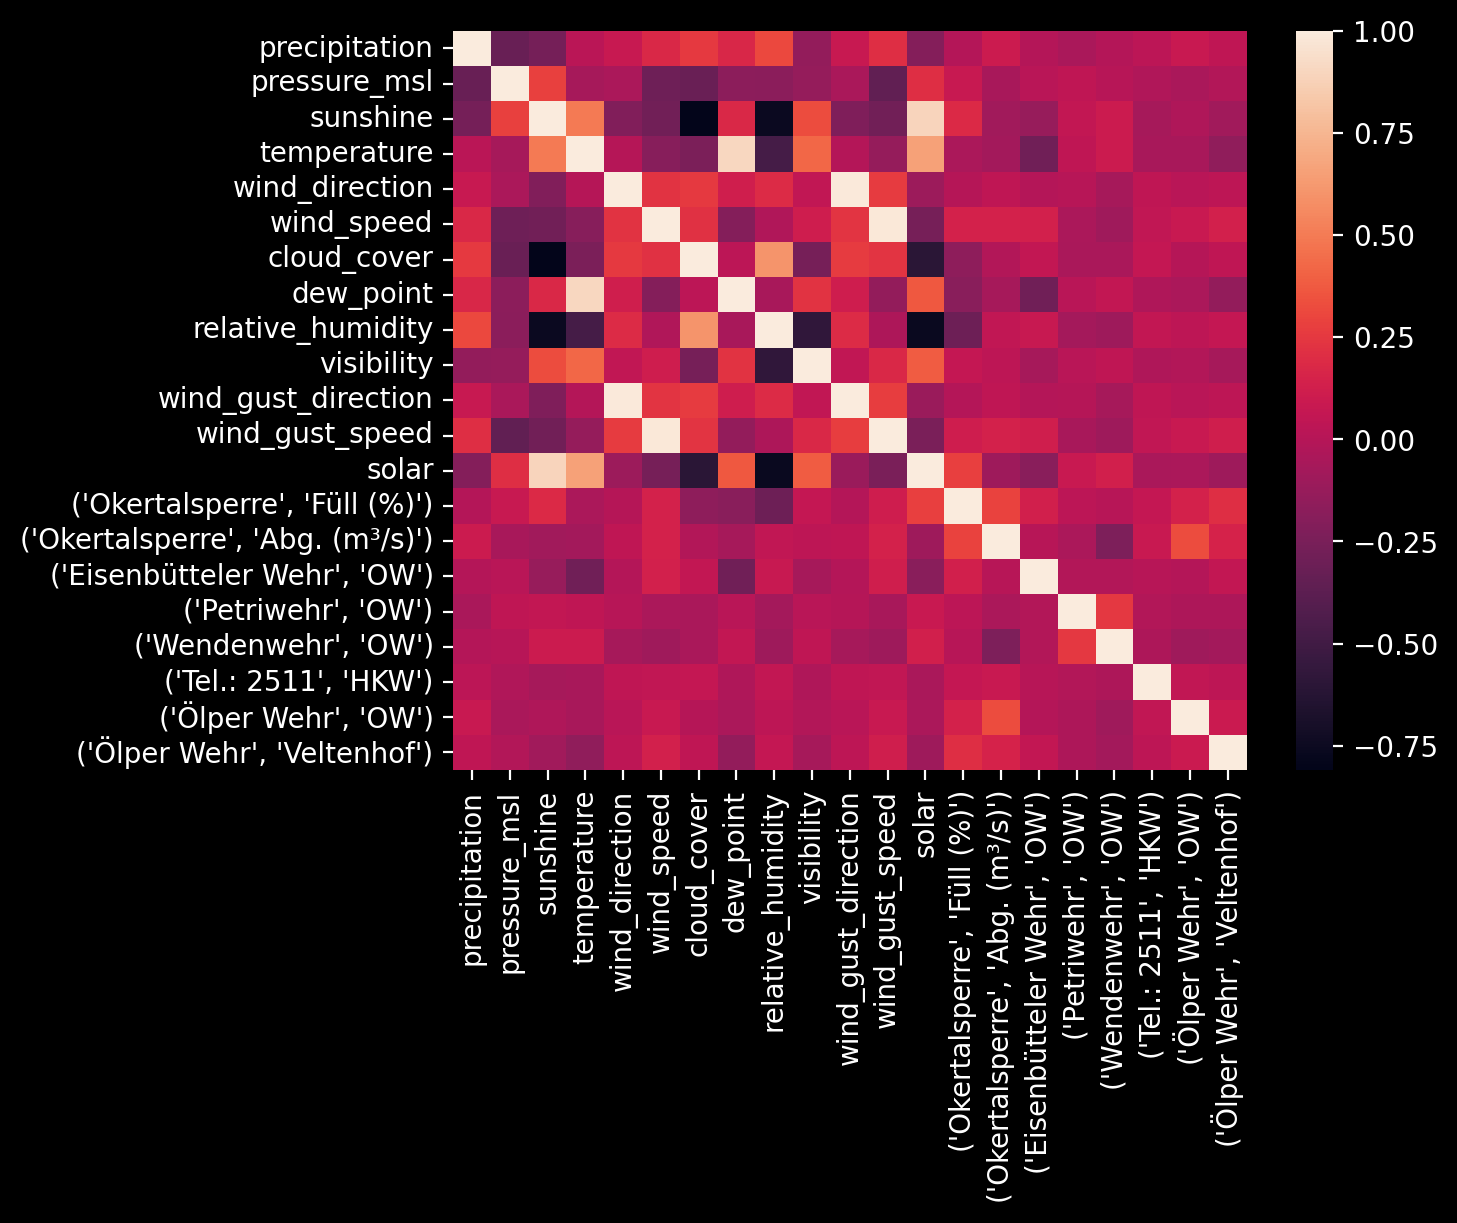

In [180]:
sns.heatmap(data_full.corr())

## Okertalsperre Füll (%)

In [196]:
Okertalsperre_1 = data_full.loc[
	:, weather_data.columns.to_list() + [("Okertalsperre", "Füll (%)")]
].corr()[[("Okertalsperre", "Füll (%)")]]
Okertalsperre_1 = Okertalsperre_1.iloc[:-1]
Okertalsperre_1 = Okertalsperre_1.rename(
	columns={("Okertalsperre", "Füll (%)"): "correlation"}
)
Okertalsperre_1.loc[:, "absolute_correlation"] = abs(Okertalsperre_1["correlation"])
Okertalsperre_1.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
relative_humidity,-0.307147,0.307147
solar,0.275294,0.275294
dew_point,-0.187220,0.187220
sunshine,0.182254,0.182254
cloud_cover,-0.161378,0.161378
wind_speed,0.139278,0.139278
wind_gust_speed,0.110452,0.110452
pressure_msl,0.079660,0.079660
visibility,0.062867,0.062867
temperature,-0.039715,0.039715


## Okertalsperre Abg. (m³/s)

In [197]:
Okertalsperre_2 = data_full.loc[
	:, weather_data.columns.to_list() + [("Okertalsperre", "Abg. (m³/s)")]
].corr()[[("Okertalsperre", "Abg. (m³/s)")]]
Okertalsperre_2 = Okertalsperre_2.iloc[:-1]
Okertalsperre_2 = Okertalsperre_2.rename(
	columns={("Okertalsperre", "Abg. (m³/s)"): "correlation"}
)
Okertalsperre_2.loc[:, "absolute_correlation"] = abs(Okertalsperre_2["correlation"])
Okertalsperre_2.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
wind_gust_speed,0.139585,0.139585
wind_speed,0.139512,0.139512
solar,-0.102075,0.102075
precipitation,0.095711,0.095711
sunshine,-0.084491,0.084491
temperature,-0.080577,0.080577
dew_point,-0.066391,0.066391
pressure_msl,-0.053220,0.053220
relative_humidity,0.047539,0.047539
wind_direction,0.044363,0.044363


## Eisenbüttler Wehr

In [209]:
eisenbuetteler = data_full.loc[
	:,
	weather_data.columns.to_list()
	+ [
		("Okertalsperre", "Füll (%)"),
		("Okertalsperre", "Abg. (m³/s)"),
		("Eisenbütteler Wehr", "OW"),
	],
].corr()[[("Eisenbütteler Wehr", "OW")]]
eisenbuetteler = eisenbuetteler.iloc[:-1]
eisenbuetteler = eisenbuetteler.rename(
	columns={("Eisenbütteler Wehr", "OW"): "correlation"}
)
eisenbuetteler.loc[:, "absolute_correlation"] = abs(eisenbuetteler["correlation"])
eisenbuetteler.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
dew_point,-0.287536,0.287536
temperature,-0.286515,0.286515
solar,-0.181927,0.181927
wind_speed,0.131716,0.131716
"(Okertalsperre, Füll (%))",0.126241,0.126241
sunshine,-0.126130,0.126130
wind_gust_speed,0.117962,0.117962
relative_humidity,0.078814,0.078814
visibility,-0.064173,0.064173
cloud_cover,0.053507,0.053507


## Petriwehr

In [204]:
petriwehr = data_full.loc[
	:, weather_data.columns.to_list() + [("Petriwehr", "OW")]
].corr()[[("Petriwehr", "OW")]]
petriwehr = petriwehr.iloc[:-1]
petriwehr = petriwehr.rename(columns={("Petriwehr", "OW"): "correlation"})
petriwehr.loc[:, "absolute_correlation"] = abs(petriwehr["correlation"])
petriwehr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
solar,0.084162,0.084162
relative_humidity,-0.068995,0.068995
sunshine,0.059843,0.059843
wind_gust_speed,-0.054871,0.054871
cloud_cover,-0.052773,0.052773
precipitation,-0.046551,0.046551
temperature,0.045520,0.045520
pressure_msl,0.044493,0.044493
wind_speed,-0.040543,0.040543
dew_point,0.017031,0.017031


## Wendenwehr

In [205]:
wendenwehr = data_full.loc[
	:, weather_data.columns.to_list() + [("Wendenwehr", "OW")]
].corr()[[("Wendenwehr", "OW")]]
wendenwehr = wendenwehr.iloc[:-1]
wendenwehr = wendenwehr.rename(columns={("Wendenwehr", "OW"): "correlation"})
wendenwehr.loc[:, "absolute_correlation"] = abs(wendenwehr["correlation"])
wendenwehr.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
solar,0.130049,0.130049
relative_humidity,-0.100353,0.100353
temperature,0.099074,0.099074
sunshine,0.097678,0.097678
wind_gust_speed,-0.096904,0.096904
wind_speed,-0.090553,0.090553
wind_gust_direction,-0.063882,0.063882
wind_direction,-0.060844,0.060844
dew_point,0.059736,0.059736
cloud_cover,-0.046659,0.046659


## Tel(?)

In [206]:
tel = data_full.loc[:, weather_data.columns.to_list() + [("Tel.: 2511", "HKW")]].corr()[
	[("Tel.: 2511", "HKW")]
]
tel = tel.iloc[:-1]
tel = tel.rename(columns={("Tel.: 2511", "HKW"): "correlation"})
tel.loc[:, "absolute_correlation"] = abs(tel["correlation"])
tel.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
sunshine,-0.060605,0.060605
cloud_cover,0.060483,0.060483
relative_humidity,0.059923,0.059923
temperature,-0.059705,0.059705
wind_speed,0.052315,0.052315
solar,-0.052267,0.052267
wind_gust_speed,0.050707,0.050707
wind_gust_direction,0.043620,0.043620
wind_direction,0.040860,0.040860
dew_point,-0.031300,0.031300


## Ölper Wehr OW

In [207]:
ölper1 = data_full.loc[
	:, weather_data.columns.to_list() + [("Ölper Wehr", "OW")]
].corr()[[("Ölper Wehr", "OW")]]
ölper1 = ölper1.iloc[:-1]
ölper1 = ölper1.rename(columns={("Ölper Wehr", "OW"): "correlation"})
ölper1.loc[:, "absolute_correlation"] = abs(ölper1["correlation"])
ölper1.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
wind_gust_speed,0.086702,0.086702
precipitation,0.084820,0.084820
wind_speed,0.083581,0.083581
temperature,-0.054486,0.054486
pressure_msl,-0.046406,0.046406
solar,-0.044988,0.044988
dew_point,-0.043942,0.043942
relative_humidity,0.038375,0.038375
sunshine,-0.025773,0.025773
wind_direction,0.011566,0.011566


## Ölper Wehr Veltenhof

In [208]:
ölper2 = data_full.loc[
	:, weather_data.columns.to_list() + [("Ölper Wehr", "Veltenhof")]
].corr()[[("Ölper Wehr", "Veltenhof")]]
ölper2 = ölper2.iloc[:-1]
ölper2 = ölper2.rename(columns={("Ölper Wehr", "Veltenhof"): "correlation"})
ölper2.loc[:, "absolute_correlation"] = abs(ölper2["correlation"])
ölper2.sort_values(by="absolute_correlation", ascending=False)

,correlation,absolute_correlation
temperature,-0.153629,0.153629
dew_point,-0.143681,0.143681
wind_speed,0.133771,0.133771
wind_gust_speed,0.122399,0.122399
solar,-0.097308,0.097308
sunshine,-0.086296,0.086296
visibility,-0.065820,0.065820
relative_humidity,0.060631,0.060631
cloud_cover,0.040993,0.040993
precipitation,0.040072,0.040072
